Instructions
This quiz will have 8 conceptual questions and 7 hands-on questions, which have to be attempted based on the following problem statement.

Problem Statement:
Leveraging customer information is of paramount importance for most businesses. In the case of a medical insurance company, analysis of customer attributes like age, sex, number of children, etc. can be crucial in making more personalized and affordable health insurance policies. 

MedicaInsure, a medical insurance provider, aims to analyze customer attributes for building a predictive model and make decisions regarding the premium amount to be charged.


Customer’s data provided by MedicaInsure - insurance.csv

Attribute information:

age: age of the policyholder
sex: gender of the policyholder
bmi: Body Mass Index of the policyholder
children: number of children of the policyholder
smoker: whether the policyholder is a smoker or not (Yes/No)
region: region where the policyholder belongs to
charges: premium charged to the policyholder
Kindly go through these guidelines before you attempt the quiz : 
Hands-on based questions will require you to solve the business problem using the Linear Regression algorithm in Python. Therefore, please keep the Jupyter Notebook open when you start the quiz.
Please download and import the dataset (insurance.csv) to attempt the hands-on questions.
To maintain uniformity in the results, please use random_state=1 while splitting the dataset.
Only attempt the quiz when you are prepared and have enough time on your hands to finish it. Please ensure you attempt the quiz well before the due date. No extension will be provided for any quiz once the deadline is passed.
Ensure there is a proper internet connection while taking up the quiz. Any breakup in the connection will automatically submit your quiz.
The quiz once opened, must be completed within the time frame provided. You CANNOT start the quiz, leave it unattended for an extended period of time and come back later to finish.
No re-attempts will be provided if the quiz gets submitted for any of the above-mentioned reasons.
If you face any other technical issues on Olympus, you should share the screenshot with your Program Manager so that the team can understand and resolve it on priority.

In [1]:
# Reading files and numerical manipulation libraries.
import pandas as pd
import numpy as np

# Visualization library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Suppress the warning associated with matplotlib library.
import warnings
warnings.filterwarnings("ignore")

/home/isaac/anaconda3/envs/opencv_env/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


Load the given ‘insurance.csv’ dataset. What is the shape of the dataset and how many values are missing in the charges column?

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data['charges'].isnull().value_counts(ascending=False).T

False    1338
Name: charges, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.shape

(1338, 7)

In [9]:
columns = ['age', 'charges']

In [11]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


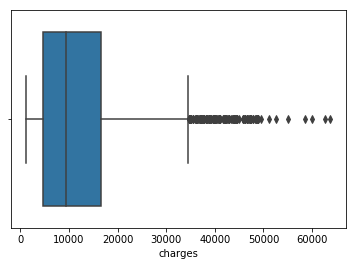

In [12]:
sns.boxplot(data=data, x='charges')

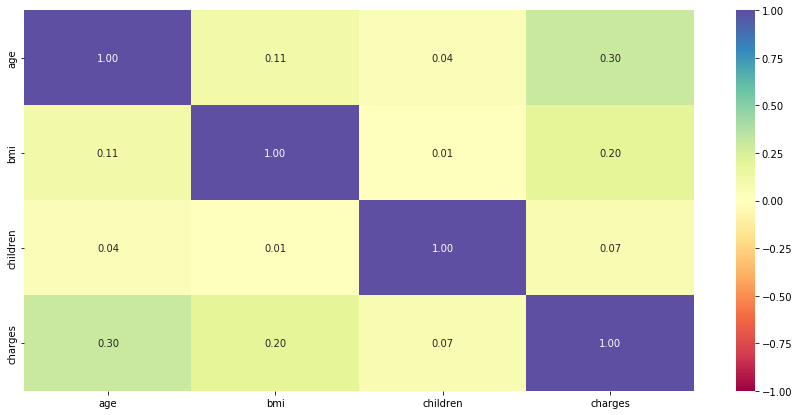

In [13]:
corr = data.corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

The given data set contains 3 categorical columns - ‘sex’, ‘smoker’, and ‘region’. 

In order to build a regression model with categorical columns, create dummy variables for these categorical columns, using pd.get_dummies() with drop_first=True. 

A dummy variable will be dropped for which of the following regions?

In [20]:
cData = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [19]:
cData.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [21]:
cData.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


Split the given data in the 70:30 ratio to obtain the train and test sets, and then train the linear regression model. 

Identify the correct range of R^2 for the training set. 

In [25]:
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression

In [27]:
cData.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [35]:
# lets build our linear model
# independant variables
X = cData.drop(['charges'], axis=1)
# the dependent variable
y = cData[['charges']]

In [36]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [40]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [41]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for age is 251.6818651463025
The coefficient for bmi is 322.3891068370293
The coefficient for children is 344.9642552960625
The coefficient for sex_male is -282.79634660879617
The coefficient for smoker_yes is 24059.39047692338
The coefficient for region_northwest is -304.0900976542754
The coefficient for region_southeast is -939.3420969057131
The coefficient for region_southwest is -868.1885586576684


In [42]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -11039.238418561546


In [43]:
regression_model.score(X_train, y_train)

0.7545557492633161

In [44]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)

0.7405989316927211

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.8431274021521561


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [48]:
y_pred = regression_model.predict(X_test) #lr is the linear regression model here.

In [51]:
mean_absolute_error(y_test, y_pred)

4139.93206476601